# Downloading the Dataset

In [ ]:
!pip install kaggle
!mkdir .kaggle
!mv kaggle.json .kaggle
!mv .kaggle /root/

!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset
!unzip heart-attack-analysis-prediction-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 3.99MB/s]
Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
!rm heart-attack-analysis-prediction-dataset.zip

# About the Dataset

**Age:** Age of the patient

**Sex:** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp:** Chest Pain type chest pain type

> Value 1: typical angina

> Value 2: atypical angina

> Value 3: non-anginal pain

> Value 4: asymptomatic

**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholestoral in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg:** resting electrocardiographic results


> Value 0: normal

> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  
**thalach:** maximum heart rate achieved

**target:** 0= less chance of heart attack 1= more chance of heart attack

# Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
rows, cols = df.shape
print(f"There {rows} patients and {cols} attributes in this dataset")

There 303 patients and 14 attributes in this dataset


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop(164, axis=0, inplace=True)

In [ ]:
df[df.duplicated()].shape[0]

0

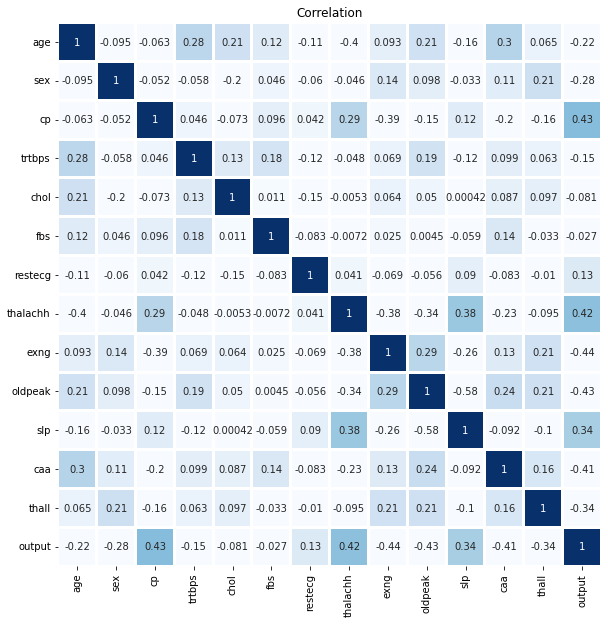

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title("Correlation")
sns.heatmap(df.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, annot=True, cmap='Blues')
plt.show()

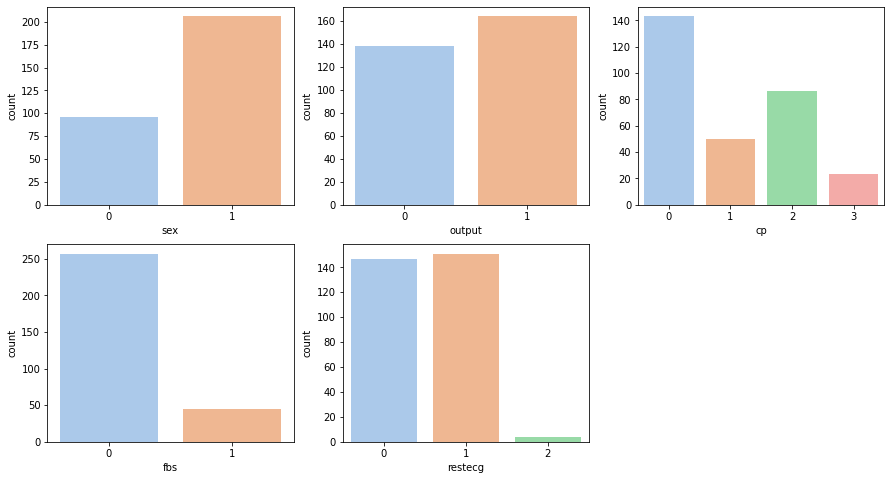

In [ ]:
countplot_list = ['sex', 'output','cp','fbs', 'restecg']
plt.subplots(figsize=(15,8))
index = 1
for i in countplot_list:
  plt.subplot(2,3,index)
  sns.countplot(data=df, x=i, palette='pastel')
  index += 1

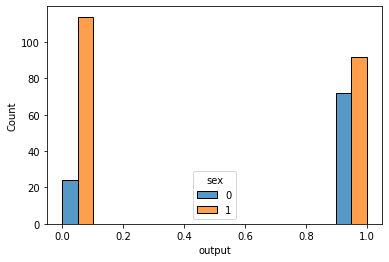

In [ ]:
sns.histplot(data=df, x="output", hue="sex", multiple="dodge")

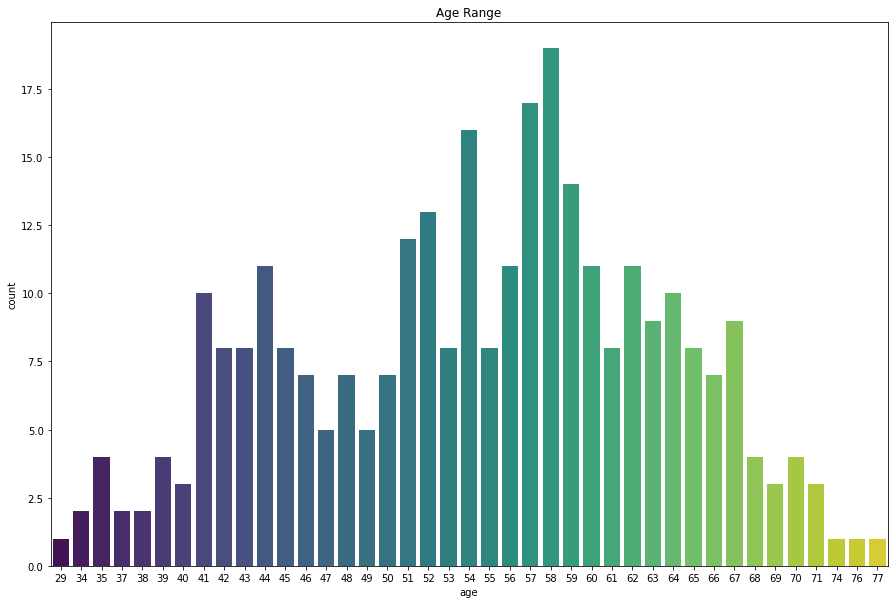

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='age',palette="viridis")
plt.title('Age Range')
plt.show()

Text(0.5, 1.0, 'Fasting Blood Sugar')

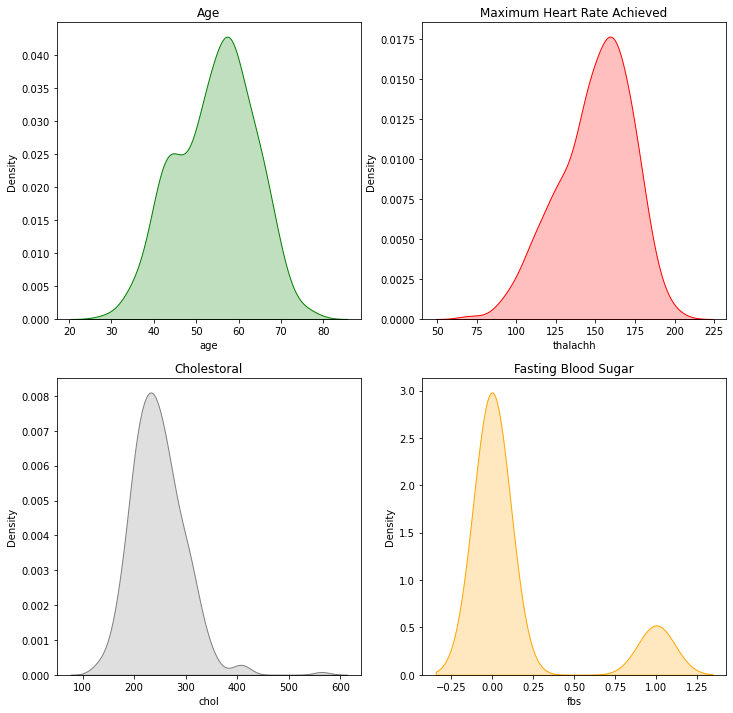

In [ ]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.kdeplot(data=df, x="age", shade=True, color='green').set_title('Age')

plt.subplot(222)
sns.kdeplot(data=df,x="thalachh", shade=True, color='red').set_title("Maximum Heart Rate Achieved")

plt.subplot(223)
sns.kdeplot(data=df,x="chol", shade=True, color='grey').set_title('Cholestoral')

plt.subplot(224)
sns.kdeplot(data=df,x="fbs", shade=True, color='orange').set_title('Fasting Blood Sugar')

In [ ]:
px.box(df,x="thalachh",
             width=800, height=500, 
             labels={'thalachh': "Maximum Heart Rate Achieved"}, title="Maximum Heart Rate Achieved"
      )

In [ ]:
px.box(df,x="chol",
             width=800, height=500, 
             labels={'output': 'Heart Attack', 'chol': "Cholestoral"}, title="Heart Attack by Cholestoral"
      )

Remvoing Outliers

In [ ]:
# Q1 = df['chol'].quantile(0.25)
# Q3 = df['chol'].quantile(0.75)
# iqr = Q3 - Q1
# upper_limit = Q3 + 1.5 * iqr
# lower_limit = Q1 - 1.5 * iqr
# df = df[df['chol'] < upper_limit].reset_index()

In [ ]:
# px.box(df,x="chol",
#              width=800, height=500, 
#              labels={'output': 'Heart Attack', 'chol': "Cholestoral"}, title="Heart Attack by Cholestoral"
#       )

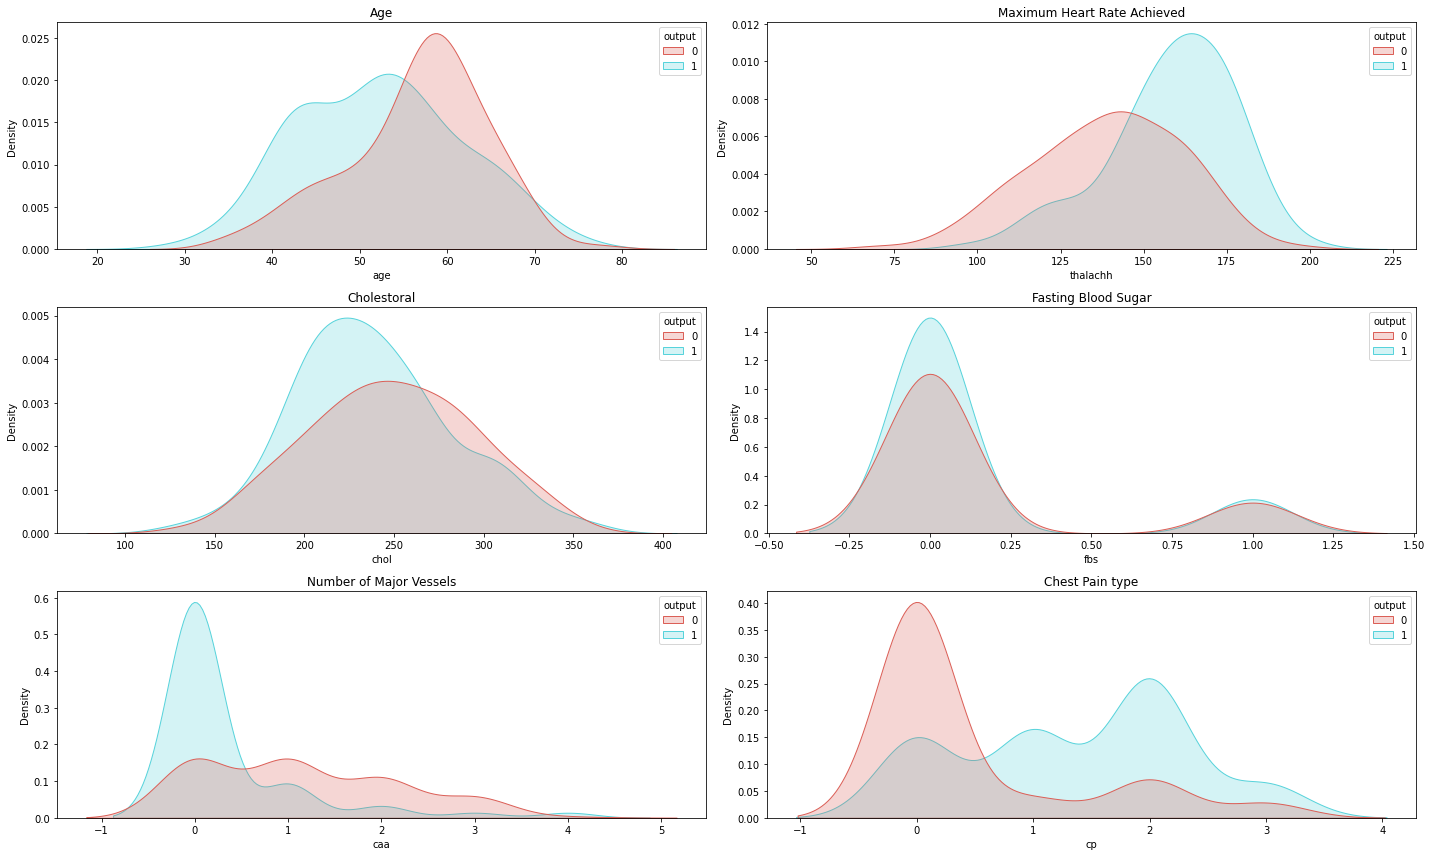

In [ ]:
fig = plt.figure(figsize=(20, 12))

plt.subplot(321)
sns.kdeplot(data=df, x="age", shade=True, hue=df['output'], palette='hls').set_title('Age')

plt.subplot(322)
sns.kdeplot(data=df,x="thalachh", shade=True, hue=df['output'], palette='hls').set_title("Maximum Heart Rate Achieved")

plt.subplot(323)
sns.kdeplot(data=df,x="chol", shade=True, hue=df['output'], palette='hls').set_title('Cholestoral')

plt.subplot(324)
sns.kdeplot(data=df,x="fbs", shade=True, hue=df['output'], palette='hls').set_title('Fasting Blood Sugar')

plt.subplot(325)
sns.kdeplot(data=df,x="caa", shade=True, hue=df['output'], palette='hls').set_title('Number of Major Vessels')

plt.subplot(326)
sns.kdeplot(data=df,x="cp", shade=True, hue=df['output'], palette='hls').set_title('Chest Pain type')

fig.tight_layout()
plt.show()

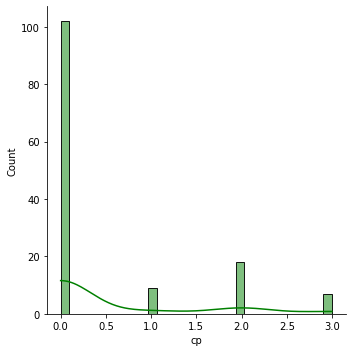

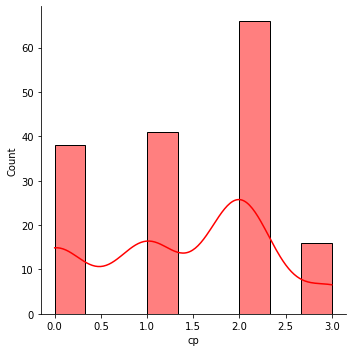

In [ ]:
sns.displot(df[df['output'] == 0]["cp"], color='green',kde=True) 

sns.displot(df[df['output'] == 1]["cp"], color='red',kde=True)

plt.tight_layout()
plt.show()

# Classification

## Encoding Categorical Columns

In [ ]:
categorical_cols = ['sex',	'cp',	'fbs',	'restecg',	'exng',	'slp',	'caa',	'thall']
encoded_df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

X = encoded_df.drop(['output'],axis=1)
y = encoded_df[['output']]

In [ ]:
encoded_df

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
294,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
295,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
296,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [ ]:
X

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.000000,0.708333,1.0,1.000000,0.481132,0.457265,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.003311,0.166667,1.0,0.666667,0.339623,0.529915,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.006623,0.250000,0.0,0.333333,0.339623,0.333333,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.009934,0.562500,1.0,0.333333,0.245283,0.470085,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.013245,0.583333,0.0,0.000000,0.245283,0.974359,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.986755,0.583333,0.0,0.000000,0.433962,0.491453,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
293,0.990066,0.333333,1.0,1.000000,0.150943,0.589744,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
294,0.993377,0.812500,1.0,0.000000,0.471698,0.286325,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
295,0.996689,0.583333,1.0,0.000000,0.339623,0.021368,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


## Building the Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 22) (242, 1)
Test set: (61, 22) (61, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



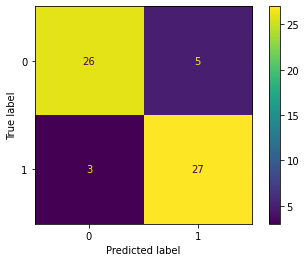

In [ ]:
LR = LogisticRegression(C=0.5, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ytrain = LR.predict(X_train)
print(classification_report(y_train, ytrain))
print(classification_report(y_test, yhat))

In [ ]:
# train_acc = []
# test_acc = []

# k = [3,4,5,6,7,8,9,10]
# for i in k:
#   neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
#   yhat = neigh.predict(X_test)
#   ytrain = LR.predict(X_train)
#   train_acc.append(accuracy_score(y_train, ytrain))
#   test_acc.append(accuracy_score(y_test, yhat))

# cm = confusion_matrix(y_test, yhat)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

# ytrain = LR.predict(X_train)
# print(classification_report(y_train, ytrain))
# print(classification_report(y_test, yhat))
# print(list(zip(train_acc, test_acc)))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.90      0.87      0.88        30

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



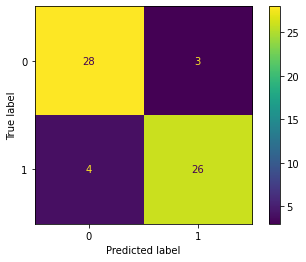

In [ ]:
from sklearn.metrics import accuracy_score

k = 8

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ytrain = LR.predict(X_train)
print(classification_report(y_train, ytrain))
print(classification_report(y_test, yhat))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



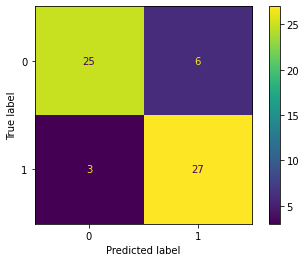

In [ ]:
clf = SVC(kernel='linear', random_state=10).fit(X_train,y_train)
yhat = clf.predict(X_test)

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ytrain = LR.predict(X_train)
print(classification_report(y_train, ytrain))
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242

              precision    recall  f1-score   support

           0       0.67      0.58      0.62        31
           1       0.62      0.70      0.66        30

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



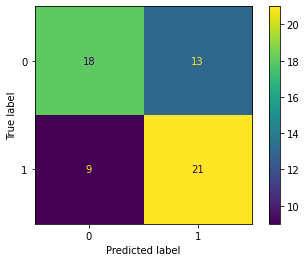

In [ ]:
dt = DecisionTreeClassifier(random_state = 10).fit(X_train,y_train)
yhat = dt.predict(X_test)

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

ytrain = LR.predict(X_train)
print(classification_report(y_train, ytrain))
print(classification_report(y_test, yhat))